# TSNE TF-IDF Visualization For Amazon Fine Food Reviews

This Dataset conists of reviews of fine foods from amazon.
which includes:
- Reviews from Oct 1999 - Oct 2012
- Total of 568,454 reviews
- Given by 256,059 users
- For 74,258 products

# Data Cleaning and Loading

The same data is cleaned, by removing the duplicates and the reviews for which HelpfulnessNumerator is greater than HelpfulnessDenominator. So it is reduced to 364171 reviews with same 10 columns. This data with 364171 reviews is stored in a SQLite Database named 'final_sqlite' and the table for these reviews is 'Reviews'.

We load the data using SQLite in to pandas dataframe

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('final_sqlite')
data = pd.read_sql_query('''select * from Reviews ''', conn)
print(data.shape)

(364171, 12)


In [2]:
def convert(x):
     '''To convert the reviews to positive(1) or negative(0)'''
    if x<3:
        return 0
    else:
        return 1
score =  data['Score'].map(convert)
print(data.shape)
print(score.shape)
print(data.head())

(364171, 12)
(364171,)
    index      Id   ProductId          UserId                  ProfileName  \
0  138706  150524  0006641040   ACITT7DI6IDDL              shari zychinski   
1  138688  150506  0006641040  A2IW4PEEKO2R0U                        Tracy   
2  138689  150507  0006641040  A1S4A3IQ2MU7V4        sally sue "sally sue"   
3  138690  150508  0006641040     AZGXZ2UUK6X  Catherine Hallberg "(Kate)"   
4  138691  150509  0006641040  A3CMRKGE0P909G                       Teresa   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      5   939340800   
1                     1                       1      4  1194739200   
2                     1                       1      4  1191456000   
3                     1                       1      5  1076025600   
4                     3                       4      5  1018396800   

                                      Summary  \
0                   EVERY book is educ

Here we determine a review as Positive or Negative by using the score. If score is more than 3 then it is considered as a positive and negative if it is less than 3 and will ignore if score is 3, as we can't decide whether it will fall into positive or negative category. The data which is in the Reviews table is queried/ saved without the reviews with score 3.

# TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,1))
features = tf_idf_vect.fit_transform(data['Text'].values)

In [5]:
print(features.shape)
print(score.shape)

(364171, 115281)
(364171,)


In [6]:
from sklearn.preprocessing import StandardScaler
features = StandardScaler(with_mean=False).fit_transform(features)
print(features.shape)

(364171, 115281)


In [7]:
f_1k = features[0:1000].todense()
s_1k = score[0:1000]
print(f_1k.shape)

(1000, 115281)


# TSNE Visualization of TF-IDF

In [9]:
from sklearn.manifold import TSNE
model = TSNE(n_components =2, random_state = 0)
tsne_data = model.fit_transform(f_1k)
print(tsne_data.shape)

(1000, 2)


We choose 1000 records to visualize data using TSNE

In [10]:
import numpy as np
c_data = np.vstack((tsne_data.T, s_1k)).T
df = pd.DataFrame(c_data, columns =( 'vector1', 'vector2', 'label'))
print(df.shape)

(1000, 3)


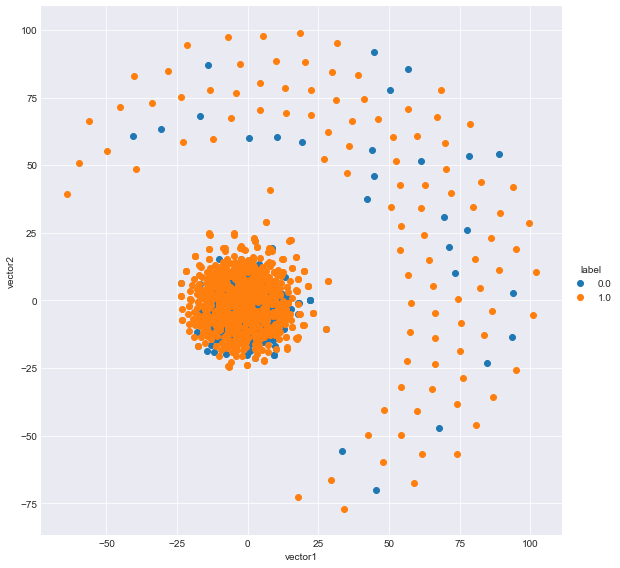

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.FacetGrid(df, hue = 'label', size =8).map(plt.scatter,'vector1', 'vector2').add_legend()
plt.show()

In [13]:
f_2k = features[0:2000].todense()
s_2k = score[0:2000]
print(f_2k.shape)

(2000, 115281)


We choose 2000 records to visualize data using TSNE

In [14]:
model = TSNE(n_components =2, random_state = 0)
tsne_data = model.fit_transform(f_2k)
print(tsne_data.shape)

(2000, 2)


In [15]:
c_data = np.vstack((tsne_data.T, s_2k)).T
df = pd.DataFrame(c_data, columns =( 'vector1', 'vector2', 'label'))
print(df.shape)

(2000, 3)


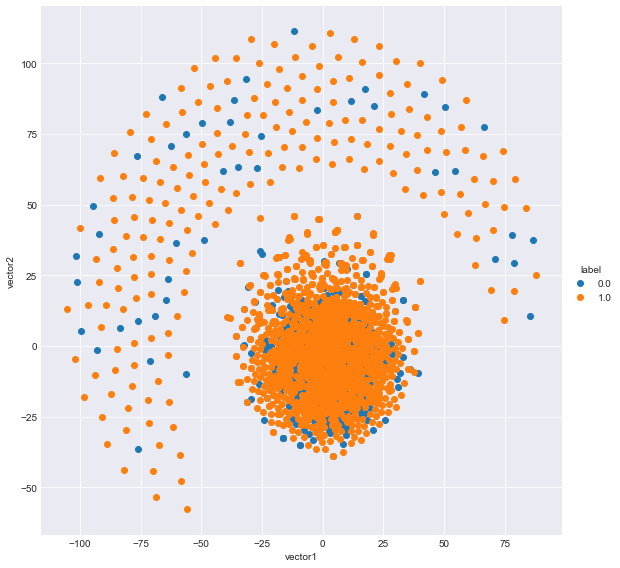

In [16]:
sns.set_style('darkgrid')
sns.FacetGrid(df, hue = 'label', size =8).map(plt.scatter,'vector1', 'vector2').add_legend()
plt.show()

# Observations:
Both the plots doesnot give much variations and we cannot bifercate or differentiate whether a review is positive or negative. Both the reviews are spread accross the graph. So we will proceed with other approaches and check whether they can be bifercated.